In [1]:
import numpy as np
from chmm_actions import CHMM, forwardE, backwardE, updateCE
import matplotlib.pyplot as plt
import igraph
from matplotlib import cm, colors
import os
import seaborn as sb
import scipy
import random
import pandas as pd
from matplotlib.colors import ListedColormap
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42

In [2]:
def get_mess_fwd(chmm, x, pseudocount=0.0, pseudocount_E=0.0):
    n_clones = chmm.n_clones
    E = np.zeros((n_clones.sum(), len(n_clones)))
    last = 0
    for c in range(len(n_clones)):
        E[last : last + n_clones[c], c] = 1
        last += n_clones[c]
    E += pseudocount_E
    norm = E.sum(1, keepdims=True)
    norm[norm == 0] = 1
    E /= norm
    T = chmm.C + pseudocount
    norm = T.sum(2, keepdims=True)
    norm[norm == 0] = 1
    T /= norm
    T = T.mean(0, keepdims=True)
    log2_lik, mess_fwd = forwardE(
        T.transpose(0, 2, 1), E, chmm.Pi_x, chmm.n_clones, x, x * 0, store_messages=True
    )
    return mess_fwd


0


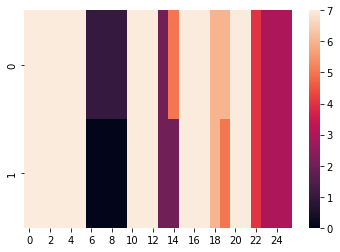

Average number of clones: 150.0


100%|██████████████████████████| 10/10 [00:00<00:00, 16.44it/s, train_bps=0.112]


1


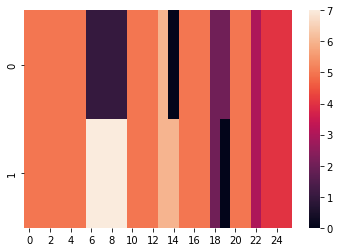

Average number of clones: 150.0


100%|█████████████████████████| 10/10 [00:00<00:00, 19.10it/s, train_bps=0.0724]


2


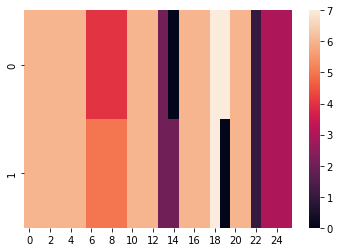

Average number of clones: 150.0


100%|█████████████████████████| 10/10 [00:00<00:00, 14.03it/s, train_bps=0.0757]


3


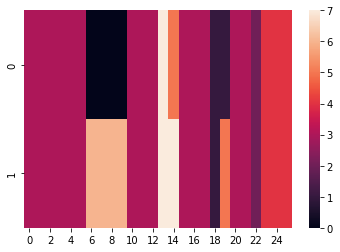

Average number of clones: 150.0


100%|█████████████████████████| 10/10 [00:00<00:00, 13.23it/s, train_bps=0.0992]


4


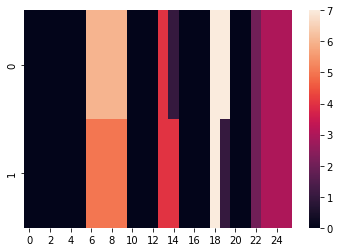

Average number of clones: 150.0


100%|██████████████████████████| 10/10 [00:00<00:00, 12.33it/s, train_bps=0.083]


5


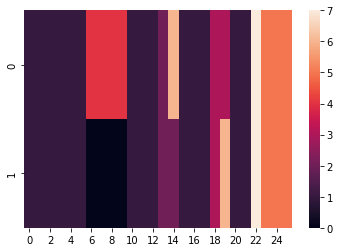

Average number of clones: 150.0


100%|█████████████████████████| 10/10 [00:00<00:00, 13.86it/s, train_bps=0.0805]


6


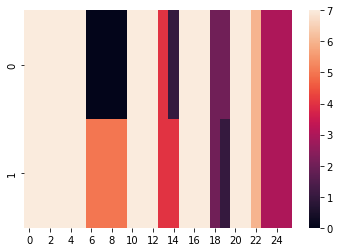

Average number of clones: 150.0


100%|█████████████████████████| 10/10 [00:00<00:00, 18.74it/s, train_bps=0.0688]


7


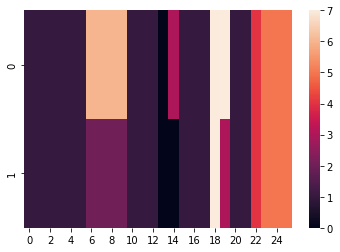

Average number of clones: 150.0


100%|██████████████████████████| 10/10 [00:00<00:00, 17.86it/s, train_bps=0.109]


8


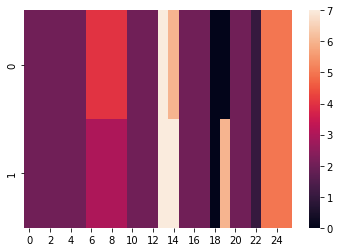

Average number of clones: 150.0


100%|█████████████████████████| 10/10 [00:00<00:00, 19.30it/s, train_bps=0.0687]


9


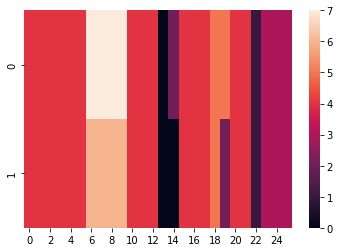

Average number of clones: 150.0


100%|█████████████████████████| 10/10 [00:00<00:00, 19.36it/s, train_bps=0.0727]


10


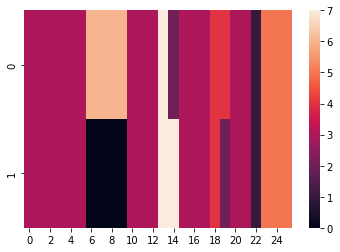

Average number of clones: 150.0


100%|█████████████████████████| 10/10 [00:00<00:00, 11.49it/s, train_bps=0.0762]


11


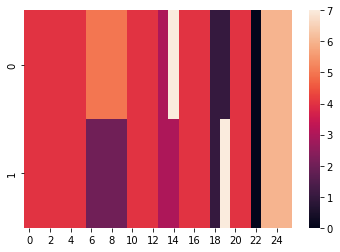

Average number of clones: 150.0


100%|██████████████████████████| 10/10 [00:00<00:00, 19.72it/s, train_bps=0.073]


12


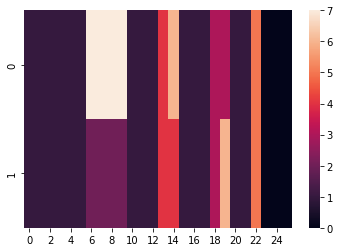

Average number of clones: 150.0


100%|█████████████████████████| 10/10 [00:00<00:00, 22.36it/s, train_bps=0.0746]


13


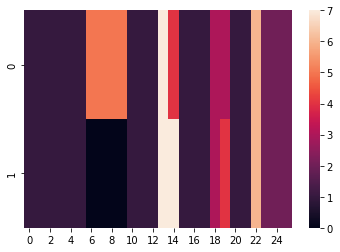

Average number of clones: 150.0


100%|██████████████████████████| 10/10 [00:00<00:00, 19.98it/s, train_bps=0.118]


14


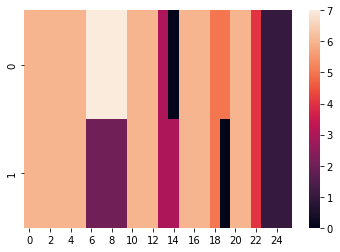

Average number of clones: 150.0


100%|█████████████████████████| 10/10 [00:00<00:00, 19.63it/s, train_bps=0.0815]


15


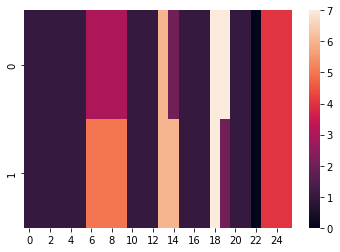

Average number of clones: 150.0


100%|█████████████████████████| 10/10 [00:00<00:00, 14.25it/s, train_bps=0.0813]


16


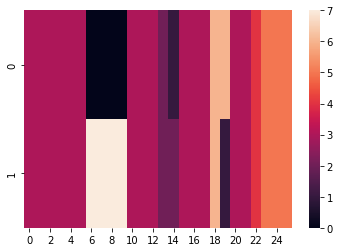

Average number of clones: 150.0


100%|█████████████████████████| 10/10 [00:00<00:00, 20.70it/s, train_bps=0.0724]


17


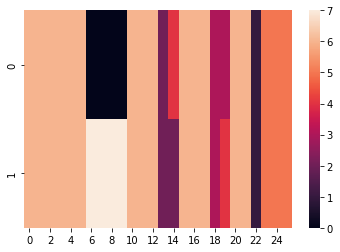

Average number of clones: 150.0


100%|█████████████████████████| 10/10 [00:00<00:00, 20.77it/s, train_bps=0.0724]


18


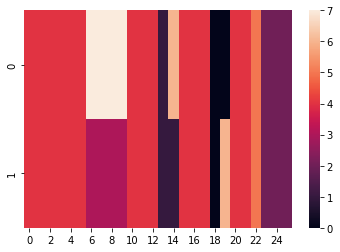

Average number of clones: 150.0


100%|██████████████████████████| 10/10 [00:00<00:00, 17.05it/s, train_bps=0.073]


19


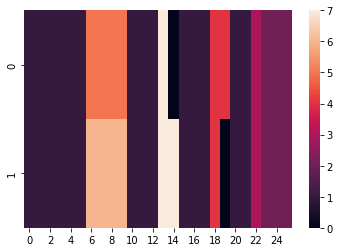

Average number of clones: 150.0


100%|█████████████████████████| 10/10 [00:00<00:00, 21.10it/s, train_bps=0.0686]


In [3]:
num_trials = 10
letter_num_dict = {'A': ln[0], 'B': ln[1], 'C': ln[2], 'D': ln[3], 'E': ln[4], 'F': ln[5], 'G': ln[6], 'H':ln[7]}
trial1x_let = np.repeat(np.array(['A','A','A','A','A','A','B', 'B', 'B', 'B', 'A','A','A', 'D','F','A','A','A','E','E', 'A', 'A', 'G','H','H','H']),1)
trial2x_let = np.repeat(np.array(['A','A','A','A','A','A','C', 'C', 'C', 'C', 'A','A','A', 'D','D','A','A','A','E','F', 'A', 'A','G','H','H','H']),1)
all_corr_runs = []

for tot_rep in range(0,20):  
    print(tot_rep)

    ln = np.random.choice(8, size=8, replace=False)
    trial1x = np.zeros(len(trial1x_let))
    trial2x = np.zeros(len(trial2x_let))
    for i in range(len(trial1x_let)):
        trial1x[i]= int(letter_num_dict.get(trial1x_let[i]))
        trial2x[i] = int(letter_num_dict.get(trial2x_let[i]))
    sb.heatmap([trial1x, trial2x])
    plt.show()

    trials = np.random.choice(2,num_trials-2)
    trials = np.concatenate((trials, np.array([0,1])))

    tr_len = len(trial1x)
    x = np.zeros(num_trials*tr_len, dtype = np.int64)


    for trial in range(len(trials)):
        if trials[trial] == 0:
            x[trial*tr_len: (trial+1)*tr_len] = trial1x
        else:
            x[trial*tr_len: (trial+1)*tr_len] = trial2x
    a = np.zeros(len(x), dtype=np.int64)
    OBS = len(np.unique(x))



    n_clones = (np.ones(OBS + 5, dtype=np.int64) * 150)
    chmm = CHMM(n_clones=n_clones, pseudocount=1e-10, x=x, a=a, seed = random.randint(1, 1000))  # Initialize the model
    for tot_iter in range(0,50):
        
        n_iter =10
        progression = chmm.learn_em_T(x, a, n_iter=n_iter, term_early=False)  # Training
        mess_fwd = get_mess_fwd(chmm, x, pseudocount_E=0.1)
        corrplot = np.zeros((len(trials), len(trials)))
        for trial1 in range(0, len(trials)):
            for trial2 in range(trial1, len(trials)):
                comp1 = mess_fwd[trial1*tr_len: (trial1+1)*tr_len,:]
                comp2 = mess_fwd[trial2*tr_len: (trial2+1)*tr_len,:]
                corrplot[trial1, trial2] = scipy.stats.pearsonr(comp1.flatten(), comp2.flatten())[0]

        ## Correlation between near and far trial types
        trial1 = mess_fwd[-tr_len:,:]
        trial0 =  mess_fwd[-2*tr_len:-tr_len,:]
        corr_plot1 = np.zeros((tr_len, tr_len))
        corr_plot0 = np.zeros((tr_len, tr_len))
        corr_plot01 = np.zeros((tr_len, tr_len))
        for posi in range(0, tr_len):
            for posj in range(0, tr_len):
                corr_plot1[posi, posj] = scipy.stats.pearsonr(trial1[posi], trial1[posj])[0]
                corr_plot0[posi, posj] = scipy.stats.pearsonr(trial0[posi], trial0[posj])[0]
                corr_plot01[posi, posj] = scipy.stats.pearsonr(trial0[posi], trial1[posj])[0]
        if tot_iter == 0:
            all_corr = corr_plot01.copy()
        else:
            all_corr = np.dstack((all_corr,corr_plot01))

    all_corr_runs.append(all_corr)
    


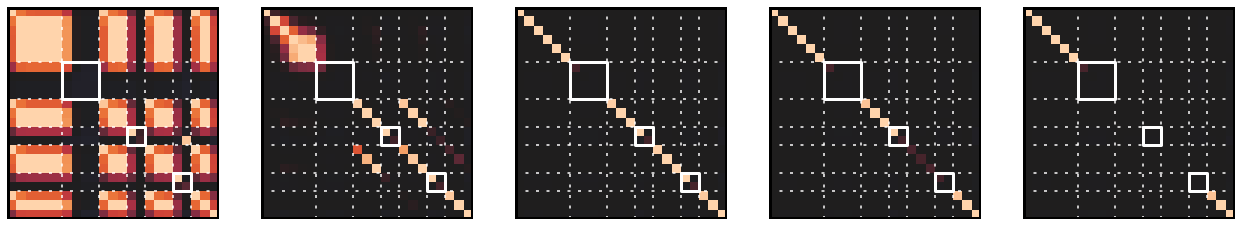

In [7]:
## Trajectory of decorrelation during learningfor a particular simulation
sim_chosen = 5
all_corr = all_corr_runs[sim_chosen]
sb.set_style("whitegrid", {'axes.grid' : False})
fig, axs = plt.subplots(1,5, figsize = (22,4))
##fig, axs = plt.subplots(1,5, figsize = (12,2))
counter = 0
for stage in [0,2,5,20,30]:
    corrplot01 = all_corr[:,:,stage][0:23,0:23]
    sb.heatmap(corrplot01, ax= axs[counter], cmap = 'icefire', vmin= -1, vmax = 1, cbar= False,rasterized=True)
    for lines in [6,10,13,15,18,20,23]:
        axs[counter ].axvline(lines, linestyle=(0, (2, 5)), color='white', linewidth=1.5)
        axs[counter ].axhline(lines, linestyle=(0, (2, 5)), color='white', linewidth=1.5)
    ##axs[counter].set_yticks(np.arange(0,23,4), np.arange(0,230,40), rotation = 45)
    ##axs[counter].set_xticks(np.arange(0,23,4), np.arange(0,230,40),rotation = 45)
    axs[counter ].axhline(y=0, color='k',linewidth=5)
    axs[counter].axhline(y=corrplot01.shape[1], color='k',linewidth=5)
    axs[counter ].axvline(x=0, color='k',linewidth=5)
    axs[counter ].axvline(x=corrplot01.shape[0], color='k',linewidth=5)
    ##axs[counter].set_title('time ' + str(avging))
    for (low, high) in [(6, 10), (13, 15), (18, 20)]:
        axs[counter].plot([low, high, high, low, low], [low, low, high, high, low], color='white',linewidth=3) 
    axs[counter].set_aspect('equal')
    axs[counter].axis('off')
    ##axs[fig_count].set_title(stage*n_iter)
    axs[counter].grid(False)
    counter+=1

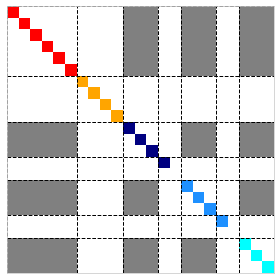

In [27]:
## Analyze decorrelation of specific regions of interest across multiple simulations

# Define 6 regions of interest
tr_len = 26
regions = [[0, 6], [10, 13], [15, 18], [20, 23]]

other_regions = np.array([10,13,14,15,18,19,20,23])
# Custom colors
colors = ['white', 'gray', 'dodgerblue','navy','red','orange','cyan']

correlation_matrix_1 = np.zeros((tr_len,tr_len))
for i, region_i in enumerate(regions):
    for j, region_j in enumerate(regions):
        if i !=j:
            for k in range(region_i[0], region_i[1]):
                for l in range(region_j[0], region_j[1]):
                    correlation_matrix_1[k, l] = 1


correlation_matrix_2 = np.zeros_like(correlation_matrix_1)
for i in range(other_regions[3], other_regions[5]):
    for j in range(other_regions[3], other_regions[5]):
        if i == j:
            correlation_matrix_2[i, j] = 1
        

correlation_matrix_3 = np.zeros_like(correlation_matrix_1)
for i in range(other_regions[0], other_regions[2]):
    for j in range(other_regions[0], other_regions[2]):
        if i == j:
            correlation_matrix_3[i, j] = 1
        

correlation_matrix_4 = np.zeros_like(correlation_matrix_1)
for i in range(0,6):
    for j in range(0,6):
        if i == j:
            correlation_matrix_4[i, j] = 1

correlation_matrix_5 = np.zeros_like(correlation_matrix_1)
for i in range(6,10):
    for j in range(6,10):
        if i == j:
            correlation_matrix_5[i, j] = 1
        

correlation_matrix_6 = np.zeros_like(correlation_matrix_1)
for i in range(20,23):
    for j in range(20,23):
        if i == j:
            correlation_matrix_6[i, j] = 1
            
correlation_matrices_1 = [correlation_matrix_1,correlation_matrix_2,correlation_matrix_3,correlation_matrix_4,correlation_matrix_5,correlation_matrix_6]
colors = ['white', 'gray', 'dodgerblue','navy','red','orange','cyan']
all_correlation_matrix = np.zeros_like(correlation_matrix_1)
for i in range(len(correlation_matrices_1)):
    all_correlation_matrix[correlation_matrices_1[i]== 1] = i+1
custom_cmap = ListedColormap(colors)
plt.imshow(all_correlation_matrix[0:23,0:23], cmap = custom_cmap, rasterized = True) 
for i, region in enumerate(regions):
    plt.axvline(x=region[0]-0.5, color='black', linewidth=1, linestyle='--')
    plt.axvline(x=region[1]-0.5, color='black', linewidth=1, linestyle='--')
    plt.axhline(y=region[0]-0.5, color='black', linewidth=1, linestyle='--')
    plt.axhline(y=region[1]-0.5, color='black', linewidth=1, linestyle='--')
plt.xticks([])
plt.yticks([])
plt.tight_layout()

In [24]:
correlation_matrices_1 = [correlation_matrix_1,correlation_matrix_2,correlation_matrix_3,correlation_matrix_4,correlation_matrix_5,correlation_matrix_6]

labels_1 = ['Off diagonal','Pre-R2', 'Pre-R1', 'Initial region','Indicator','End region']

colors_1 = colors[1:7]
all_masks_matrix = np.full((9,20,50), np.nan)

countx = 0
count = 0

for session_n in range(20):
    if count>3:
        countx = countx + 1
        count = 0
        
    corr_position_day = all_corr_runs[session_n]

    for i, mask in enumerate(correlation_matrices_1):
        mask_array = np.zeros((corr_position_day.shape[2], corr_position_day.shape[0], corr_position_day.shape[1]), dtype=bool)
        mask_array += mask.astype(bool)
        masked_a_array = np.ma.masked_array(corr_position_day.T, mask=~mask_array)
        mean_values_array = masked_a_array.mean(axis=(1, 2))
        
        all_masks_matrix[i,session_n,0:len(mean_values_array)] = mean_values_array


In [28]:
norm_time = []
for rep in range(0, 20):
    crossed1 = np.where(all_masks_matrix_new[1,rep,:]<0.1)[0]
    crossed2 = np.where(all_masks_matrix_new[2,rep,:]<0.1)[0]
    if len(crossed1)>0 and len(crossed2)>0:
        end_time = np.maximum(crossed1[0], crossed2[0])+2
        interp_mul = []
        for loc in range(0,6):
            mask_norm = all_masks_matrix_new[loc,rep,0:end_time].T
            interp = np.interp(np.arange(0,50,1),  np.linspace(0,50,end_time),mask_norm)
            interp_mul.append(interp)
        
        if len(norm_time) == 0:
            interp_all = np.array(interp_mul)
        else:
            interp_all = np.dstack((interp_all, np.array(interp_mul)))
            
        norm_time.append(end_time)

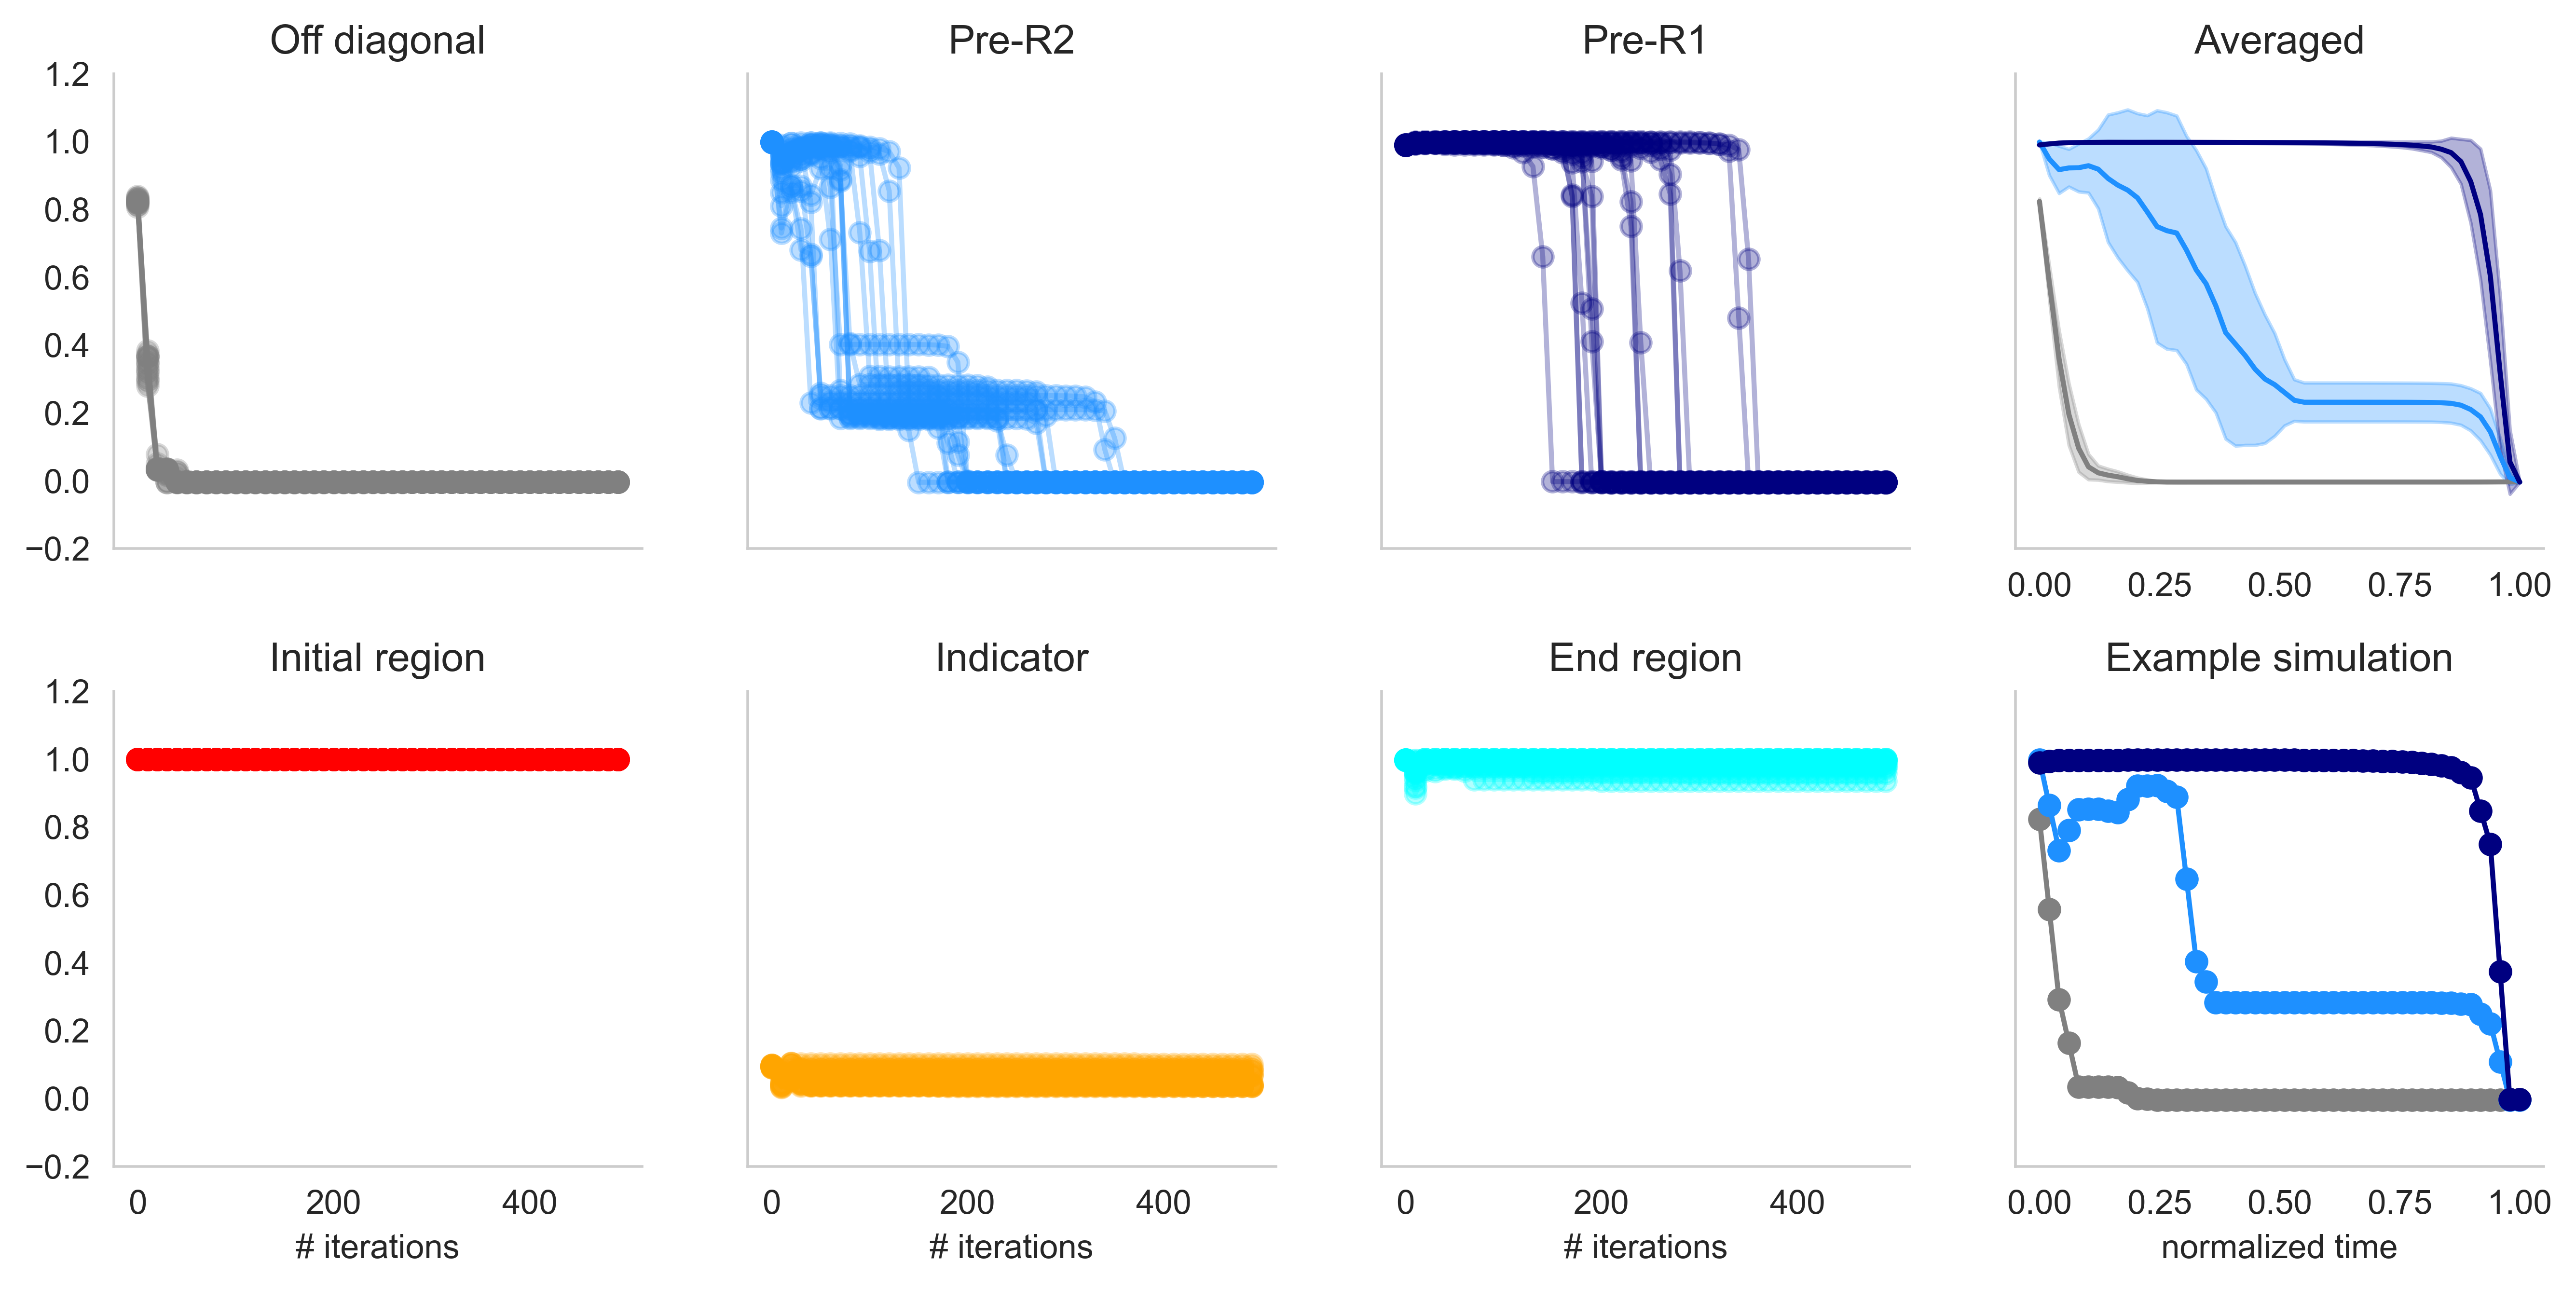

In [29]:
all_masks_matrix_new = all_masks_matrix[:,0:,:]
crossed_postr1 = (all_masks_matrix_new[1][:,-1])<0.1
crossed_prer1 = (all_masks_matrix_new[2][:,-1])<0.1
plot_reps = crossed_postr1*crossed_prer1
# Set square aspect ratio for both plots
fig1, axs1 = plt.subplots(nrows=2, ncols=4, figsize=(13, 6), dpi=500)
figx = 0
figy = 0
# Plot the first set of correlation matrices
for i, mask in enumerate(correlation_matrices_1):
    if figy>2:
        figx = figx+1
        figy = 0
    axs1[figx,figy].plot(np.arange(0, 50*n_iter, n_iter),all_masks_matrix_new[i,plot_reps,:].T, 'o-', label=labels_1[i], color=colors_1[i], alpha = 0.3)

    # Set the y-axis limits to 0 to 0.8 for the first plot
    axs1[figx,figy].set_ylim([-0.2, 1.2])

    # Add legend and labels for the first plot
    #ax1.legend(fontsize='x-small')
    ##axs1[figx,figy].set_xlabel('Session #')
    ##axs1[figx,figy].set_ylabel('Correlation Coefficient')
    if figx==0:
        axs1[figx, figy].set_xticklabels([])
    else:
        axs1[figx, figy].set_xlabel('# iterations')
    if figy>0:
        axs1[figx, figy].set_yticklabels([])
    
    axs1[figx,figy].spines['top'].set_visible(False)
    axs1[figx,figy].spines['right'].set_visible(False) 
    axs1[figx,figy].set_title(labels_1[i])
    figy = figy + 1

for i in range(0,3):
    means_plot = np.mean(interp_all[i], axis = 1)
    std_plot = np.std(interp_all[i], axis = 1)
    axs1[0,3].plot(np.linspace(0,1,50), means_plot, color=colors_1[i])
    axs1[0,3].fill_between(np.linspace(0,1,50),means_plot-std_plot, means_plot+std_plot ,alpha=0.3, color=colors_1[i])
axs1[0,3].set_ylim([-0.2, 1.2])
axs1[0,3].spines['top'].set_visible(False)
axs1[0,3].spines['right'].set_visible(False)
axs1[0,3].set_title('Averaged')
    ##axs1[0,3].set_xticklabels([])
    
axs1[0,3].set_yticklabels([])
    
rep_chosen = 0
for i in range(0,3):
    axs1[1,3].plot(np.linspace(0,1,50),interp_all[i, :,rep_chosen], 'o-', label=labels_1[i], color=colors_1[i])
axs1[1,3].set_ylim([-0.2, 1.2])
axs1[1,3].set_yticklabels([])
axs1[1,3].set_xlabel('normalized time')
axs1[1,3].spines['top'].set_visible(False)
axs1[1,3].spines['right'].set_visible(False)
axs1[1,3].set_title('Example simulation')
##plt.tight_layout()

# Set square aspect ratio for both plots
##plt.tight_layout()
plt.subplots_adjust(wspace=0.2, hspace=0.3)